# MLP

### load data

In [161]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from datetime import datetime
from functools import reduce
import operator 
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

def str_bool(x):
    if x == 'True':
        x=1
    elif x== 'False':
        x=0
    return x

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

        

In [162]:
gt=pd.read_pickle('data/groundtruth_all.pkl')#.drop(['Unnamed: 0','Unnamed: 0.1'], axis =1)
print(gt.shape)
gt=gt.drop('id', axis =1)
gt= gt.set_index('tweet_id')

#gt= pd.read_csv('data/groundtruth_hashtags_lang.csv',index_col=0 )

#check if NaN tweet_id 
#gt=gt[~gt['tweet_id'].isna()]
#gt=gt.set_index('tweet_id')

gt['quoted_status']= ~gt['quoted_status'].isnull()
gt[[ 'quoted_status']] = gt[[ 'quoted_status']].astype(int)

gt=gt.drop( [ 'lang', 'text', 'user_lang','retweeted'], axis =1)
#gt['retweeted'] = gt['retweeted'].apply(lambda x: str_bool(x))


lang_col = [col for col in gt.columns if col.startswith('lang_')] +['other lang']
user_lang_col= [col for col in gt.columns if col.startswith('user_lang_')] + ['other user lang']
hashtag_col= [col for col in gt.columns if col.startswith('Hashtag topic')] 
img_col= [col for col in gt.columns if col.startswith('im_class_')] 
topic_col= [col for col in gt.columns if col.startswith('t_topic_')]


gt[user_lang_col + ['other user lang']] = gt[user_lang_col + ['other user lang']].fillna(0)#.astype(int)
gt[lang_col + ['other lang']] = gt[lang_col + ['other lang']].fillna(0)#.astype(int)
#gt[hashtag_col] = gt[hashtag_col].fillna(0).apply(lambda x: [str_bool(y) for y in x.values])
#gt[hashtag_col] = gt[hashtag_col].astype(float)

#for tweets with no hashtags , replace NaN by 0 in hashtags topics distribution 
gt[hashtag_col]=gt[hashtag_col].fillna(0)
#for tweets with no images , replace NaN by 0 in images class probabilities
gt[img_col] = gt[img_col].fillna(0)


print(gt.shape)
gt.head()


(34511, 47)
(34511, 41)


,hashtags,quoted_status,label,Hashtag topic 0,Hashtag topic 1,Hashtag topic 2,Hashtag topic 3,Hashtag topic 4,Hashtag topic 5,Hashtag topic 6,...,image_class,image_score,im_class_0,im_class_1,im_class_2,im_class_3,im_class_4,im_class_5,im_class_6,im_class_7
tweet_id,,,,,,,,,,,,,,,,,,,,,
55c272820a1776527f63ad53,wakeupman,0,1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55c3bfea0a1776527f63df5b,NaN,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55c5cf6f0a1776527f641ef3,NaN,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55c63c020a1776527f6430bd,NaN,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55c694b10a1776527f643f13,NaN,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
gt.columns

Index(['hashtags', 'quoted_status', 'label', 'Hashtag topic 0',
       'Hashtag topic 1', 'Hashtag topic 2', 'Hashtag topic 3',
       'Hashtag topic 4', 'Hashtag topic 5', 'Hashtag topic 6',
       'Hashtag topic 7', 'user_lang_fr', 'user_lang_en', 'user_lang_de',
       'user_lang_en-gb', 'user_lang_ar', 'lang_fr', 'lang_en', 'lang_und',
       'lang_es', 'lang_pt', 'other lang', 'other user lang', 'tweet_class',
       't_topic_0', 't_topic_1', 't_topic_2', 't_topic_3', 't_topic_4',
       't_topic_5', 't_topic_6', 'image_class', 'image_score', 'im_class_0',
       'im_class_1', 'im_class_2', 'im_class_3', 'im_class_4', 'im_class_5',
       'im_class_6', 'im_class_7'],
      dtype='object')

## Training test and validation set

In [164]:
#training, test and validation with the same percentage of images and hashtags present


#with only HASHTAGS
gt_hashtag=gt[~gt['hashtags'].isnull() & gt['image_class'].isnull()]
#drop features that are str, or not to use for the training
gt_hashtag=gt_hashtag.drop(['hashtags', 'image_score', 'image_class', 'tweet_class'], axis=1)
#shuffle once
gt_hashtag = gt_hashtag.sample(frac=1)
#50% training 25% validation 25% test
train_hashtag=gt_hashtag.iloc[0:int(round(0.5*gt_hashtag.shape[0]))]
val_hashtag=gt_hashtag.iloc[ int(round(0.5*gt_hashtag.shape[0])): int(round(0.75*gt_hashtag.shape[0]))]
test_hashtag=gt_hashtag.iloc[int(round(0.75*gt_hashtag.shape[0])): int(gt_hashtag.shape[0])]


#with only IMAGES
gt_image=gt[~gt['image_class'].isnull() & gt['hashtags'].isnull()]
#drop features that are str, or not to use for the training
gt_image=gt_image.drop(['hashtags', 'image_score', 'image_class', 'tweet_class'], axis=1)
#shuffle once
gt_image = gt_image.sample(frac=1)
#50% training 25% validation 25% test
train_image=gt_image.iloc[0:int(round(0.5*gt_image.shape[0]))]
val_image=gt_image.iloc[ int(round(0.5*gt_image.shape[0])): int(round(0.75*gt_image.shape[0]))]
test_image=gt_image.iloc[int(round(0.75*gt_image.shape[0])): int(gt_image.shape[0])]


#with both IMAGES and HASHTAGS
gt_both=gt[~gt['image_class'].isnull() & ~gt['hashtags'].isnull()]
#drop features that are str, or not to use for the training
gt_both=gt_both.drop(['hashtags', 'image_score', 'image_class', 'tweet_class'], axis=1)
#shuffle once
gt_both= gt_both.sample(frac=1)
#50% training 25% validation 25% test
train_both=gt_both.iloc[0:int(round(0.5*gt_both.shape[0]))]
val_both=gt_both.iloc[ int(round(0.5*gt_both.shape[0])): int(round(0.75*gt_both.shape[0]))]
test_both=gt_both.iloc[int(round(0.75*gt_both.shape[0])): int(gt_both.shape[0])]


#without IMAGES and HASHTAGS
gt_without=gt[gt['image_class'].isnull() & gt['hashtags'].isnull()]
#drop features that are str, or not to use for the training
gt_without=gt_without.drop(['hashtags', 'image_score', 'image_class', 'tweet_class'], axis=1)
gt_without= gt_without.sample(frac=1)
#50% training 25% validation 25% test
train_without=gt_without.iloc[0:int(round(0.5*gt_without.shape[0]))]
val_without=gt_without.iloc[ int(round(0.5*gt_without.shape[0])): int(round(0.75*gt_without.shape[0]))]
test_without=gt_without.iloc[int(round(0.75*gt_without.shape[0])): int(gt_without.shape[0])]


#compute train , validation and test set with the same proportion of hashtags and images
train= train_hashtag.append(train_image).append(train_both).append(train_without)
val= val_hashtag.append(val_image).append(val_both).append(val_without)
test=test_hashtag.append(test_image).append(test_both).append(test_without)

## Model with all features

0.6371117292535929
Confusion matrix, without normalization
[[3593  909]
 [2222 1904]]
Normalized confusion matrix
[[0.8  0.2 ]
 [0.54 0.46]]


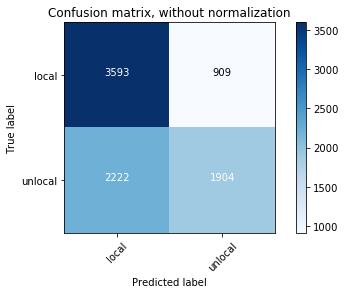

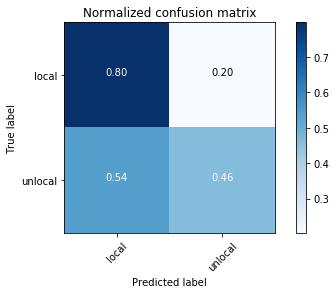

In [165]:
#train and test MLP classifier
mlp= MLPClassifier(activation ='relu', solver='adam', hidden_layer_sizes=(10,3),max_iter= 1000,shuffle=False, random_state=0,batch_size= 100 ) #alpha=0.0001 #batch size =200 , max_iter 200
mlp.fit(train.drop('label',axis=1), train['label'])
score = mlp.score(test.drop('label', axis =1),test['label'])
print(score)


y_true=test['label'].apply(lambda x : 'local' if x==1 else ( 'unlocal' if x==0  else np.NaN))
y_pred= list(map( lambda x : 'local' if x==1 else ( 'unlocal' if x==0  else np.NaN),list(mlp.predict(test.drop('label', axis =1))) ))
conf_mat=confusion_matrix(y_true, y_pred)

classes_names=['local','unlocal']

# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

plot_confusion_matrix(conf_mat,classes=classes_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat,classes=classes_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## Model without image features

0.6289986091794159
(8628, 29)
Confusion matrix, without normalization
[[3843  659]
 [2542 1584]]
Normalized confusion matrix
[[0.85 0.15]
 [0.62 0.38]]


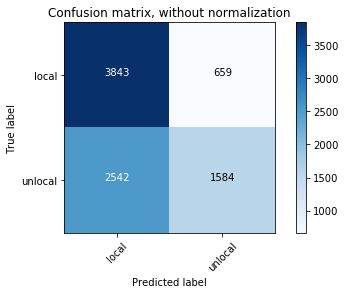

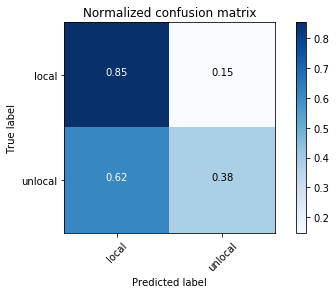

In [166]:
train_no_img= train.drop(img_col,axis=1)
test_no_img= test.drop(img_col,axis=1)
val_no_img= val.drop(img_col,axis=1)

#train and test MLP classifier
mlp_no_img= MLPClassifier(activation ='relu', solver='adam', hidden_layer_sizes=(10,3),max_iter= 1000,shuffle=False, random_state=0,batch_size= 100 ) #alpha=0.0001 #batch size =200 , max_iter 200
mlp_no_img.fit(train_no_img.drop('label',axis=1), train_no_img['label'])
score_no_img = mlp_no_img.score(test_no_img.drop('label', axis =1),test_no_img['label'])
print(score_no_img)

print(test_no_img.shape)
y_true_no_img=test['label'].apply(lambda x : 'local' if x==1 else ( 'unlocal' if x==0  else np.NaN))
y_pred_no_img= list(map( lambda x : 'local' if x==1 else ( 'unlocal' if x==0  else np.NaN),list(mlp_no_img.predict(test_no_img.drop('label', axis =1))) ))
conf_mat_no_img=confusion_matrix(y_true_no_img, y_pred_no_img)


# Plot non-normalized confusion matrix
plt.figure()

plot_confusion_matrix(conf_mat_no_img,classes=classes_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat_no_img,classes=classes_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()



## Model without hashtags features

0.6342141863699583
(8628, 29)
Confusion matrix, without normalization
[[3820  682]
 [2474 1652]]
Normalized confusion matrix
[[0.85 0.15]
 [0.6  0.4 ]]


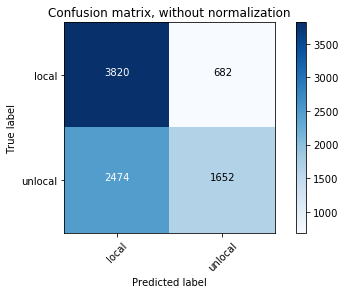

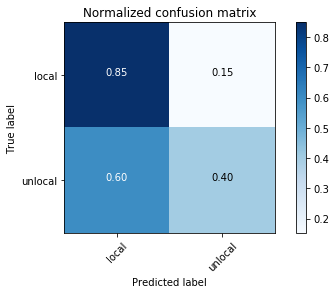

In [167]:
train_no_hashtag= train.drop(hashtag_col,axis=1)
test_no_hashtag= test.drop(hashtag_col,axis=1)
val_no_hashtag= val.drop(hashtag_col,axis=1)

#train and test MLP classifier
mlp_no_hashtag= MLPClassifier(activation ='relu', solver='adam', hidden_layer_sizes=(10,3),max_iter= 1000,shuffle=False, random_state=0,batch_size= 100 ) #alpha=0.0001 #batch size =200 , max_iter 200
mlp_no_hashtag.fit(train_no_hashtag.drop('label',axis=1), train_no_hashtag['label'])
score_no_hashtag = mlp_no_hashtag.score(test_no_hashtag.drop('label', axis =1),test_no_hashtag['label'])
print(score_no_hashtag)

print(test_no_hashtag.shape)
y_true_no_hashtag=test['label'].apply(lambda x : 'local' if x==1 else ( 'unlocal' if x==0  else np.NaN))
y_pred_no_hashtag= list(map( lambda x : 'local' if x==1 else ( 'unlocal' if x==0  else np.NaN),list(mlp_no_hashtag.predict(test_no_hashtag.drop('label', axis =1))) ))
conf_mat_no_hashtag=confusion_matrix(y_true_no_hashtag, y_pred_no_hashtag)


# Plot non-normalized confusion matrix
plt.figure()

plot_confusion_matrix(conf_mat_no_hashtag,classes=classes_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat_no_hashtag,classes=classes_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## Model without text topics features

0.6441817338896616
(8628, 30)
Confusion matrix, without normalization
[[3407 1095]
 [1975 2151]]
Normalized confusion matrix
[[0.76 0.24]
 [0.48 0.52]]


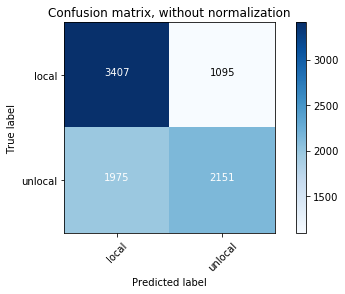

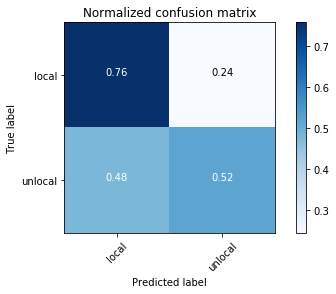

In [168]:
train_no_text_topic= train.drop(topic_col,axis=1)
test_no_text_topic= test.drop(topic_col,axis=1)
val_no_text_topic= val.drop(topic_col,axis=1)

#train and test MLP classifier
mlp_no_text_topic= MLPClassifier(activation ='relu', solver='adam', hidden_layer_sizes=(10,3),max_iter= 1000,shuffle=False, random_state=0,batch_size= 100 ) #alpha=0.0001 #batch size =200 , max_iter 200
mlp_no_text_topic.fit(train_no_text_topic.drop('label',axis=1), train_no_text_topic['label'])
score_no_text_topic = mlp_no_text_topic.score(test_no_text_topic.drop('label', axis =1),test_no_text_topic['label'])
print(score_no_text_topic)

print(test_no_text_topic.shape)
y_true_no_text_topic=test['label'].apply(lambda x : 'local' if x==1 else ( 'unlocal' if x==0  else np.NaN))
y_pred_no_text_topic= list(map( lambda x : 'local' if x==1 else ( 'unlocal' if x==0  else np.NaN),list(mlp_no_text_topic.predict(test_no_text_topic.drop('label', axis =1))) ))
conf_mat_no_text_topic=confusion_matrix(y_true_no_text_topic, y_pred_no_text_topic)


# Plot non-normalized confusion matrix
plt.figure()

plot_confusion_matrix(conf_mat_no_text_topic,classes=classes_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat_no_text_topic,classes=classes_names, normalize=True,
                      title='Normalized confusion matrix')

# OLD CODE (takes part of the groundtruth each time)

## Model with tweet lang

In [87]:
gt_tweet_lang=gt
gt_tweet_lang=gt_tweet_lang.drop(hashtag_col+ ['hashtags'] + img_col + topic_col + user_lang_col, axis= 1)
gt_tweet_lang.head()
print(gt_tweet_lang.shape)

#gt_tweet_lang = gt_tweet_lang.sample(frac=1)
#train_tweet_lang=gt_tweet_lang.iloc[0:int(round(0.5*gt_tweet_lang.shape[0]))]
#val_tweet_lang=gt_tweet_lang.iloc[int(round(0.5*gt_tweet_lang.shape[0])): int(round(0.75*gt_tweet_lang.shape[0]))]
#test_tweet_lang=gt_tweet_lang.iloc[int(round(0.75*gt_tweet_lang.shape[0])): int(gt_tweet_lang.shape[0])]

mlp_tweet_lang= MLPClassifier(activation ='relu', solver='adam', hidden_layer_sizes=(10,3),max_iter= 1000,shuffle=False, random_state=0,batch_size= 100) #alpha=0.0001 # , 
mlp_tweet_lang.fit(train_tweet_lang.drop('label',axis=1), train_tweet_lang['label'])
score_tweet_lang= mlp_tweet_lang.score(test_tweet_lang.drop('label', axis =1),test_tweet_lang['label'])
print(score_tweet_lang)

(34511, 9)
0.6264487714418173


In [68]:
gt_tweet_lang.columns

Index(['quoted_status', 'label', 'lang_fr', 'lang_en', 'lang_und', 'lang_es',
       'lang_pt', 'other lang', 'other user lang'],
      dtype='object')

## Base model with text lang and user lang (for now)

In [29]:
gt_20=gt[gt['hashtags'].isnull()]
gt_20=gt_20.drop(hashtag_col+ ['hashtags'] + img_col + topic_col, axis= 1)
gt_20.head()
print(gt_20.shape)

gt_20 = gt_20.sample(frac=1)
train_20=gt_20.iloc[0:int(round(0.5*gt_20.shape[0]))]
val_20=gt_20.iloc[ int(round(0.5*gt_20.shape[0])): int(round(0.75*gt_20.shape[0]))]
test_20=gt_20.iloc[int(round(0.75*gt_20.shape[0])): int(gt_20.shape[0])]

mlp_20= MLPClassifier(activation ='relu', solver='adam') #alpha=0.0001 #batch size =200 , max_iter 200
mlp_20.fit(train_20.drop('label',axis=1), train_20['label'])
score = mlp_20.score(test_20.drop('label', axis =1),test_20['label'])
print(score)

(26126, 14)
0.6344151867728107


## Model with hashtags

In [93]:
gt_hashtag=gt[~gt['hashtags'].isnull()]
gt_hashtag=gt_hashtag.drop(['hashtags'] + img_col + topic_col, axis= 1)
print(gt_hashtag.shape)
gt_hashtag.head()

gt_hashtag = gt_hashtag.sample(frac=1)
train_hashtag=gt_hashtag.iloc[0:int(round(0.5*gt_hashtag.shape[0]))]
val_hashtag=gt_hashtag.iloc[ int(round(0.5*gt_hashtag.shape[0])): int(round(0.75*gt_hashtag.shape[0]))]
test_hashtag=gt_hashtag.iloc[int(round(0.75*gt_hashtag.shape[0])): int(gt_hashtag.shape[0])]

mlp_hashtag= MLPClassifier(activation ='relu', solver='adam') #alpha=0.0001 #batch size =200 , max_iter 200
mlp_hashtag.fit(train_hashtag.drop('label',axis=1).fillna(0), train_hashtag['label'])
score_hashtag = mlp_hashtag.score(test_hashtag.drop('label', axis =1).fillna(0),test_hashtag['label'])
print(score_hashtag)

(8385, 22)
0.6765267175572519


## Model with images

In [31]:
gt_image=gt[~gt['image_class'].isnull()]
gt_image=gt_image.drop(['hashtags'] + hashtag_col + topic_col + ['image_class', 'image_score'], axis= 1)
print(gt_image.shape)
gt_image.head()

(3335, 22)


,quoted_status,label,user_lang_fr,user_lang_en,user_lang_de,user_lang_en-gb,user_lang_ar,lang_fr,lang_en,lang_und,...,other lang,other user lang,im_class_0,im_class_1,im_class_2,im_class_3,im_class_4,im_class_5,im_class_6,im_class_7
tweet_id,,,,,,,,,,,,,,,,,,,,,
55ecd6310a177679d904ff7d,0,1,1,0,0,0,0,1,0,0,...,0,0,0.000000,0.0,0.0,0.755072,0.0,0.0,0.0,0.000000
560ea35e0a17764c6ef1f147,0,1,1,0,0,0,0,1,0,0,...,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.939550
5652486f0a17761347b870d1,0,1,0,1,0,0,0,0,0,1,...,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.916681
5654302a0a17761347b8b4a8,0,1,1,0,0,0,0,1,0,0,...,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.078300
56a38d8b0a1776437764bb49,0,1,1,0,0,0,0,0,0,0,...,1,0,0.386316,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [32]:
gt_image = gt_image.sample(frac=1)
train_image=gt_image.iloc[0:int(round(0.5*gt_image.shape[0]))]
val_image=gt_image.iloc[ int(round(0.5*gt_image.shape[0])): int(round(0.75*gt_image.shape[0]))]
test_image=gt_image.iloc[int(round(0.75*gt_image.shape[0])): int(gt_image.shape[0])]

mlp_image= MLPClassifier(activation ='relu', solver='adam') #alpha=0.0001 #batch size =200 , max_iter 200
mlp_image.fit(train_image.drop('label',axis=1).fillna(0), train_image['label'].fillna(0).astype(int))
score_image = mlp_image.score(test_image.drop('label', axis =1).fillna(0),test_image['label'])
print(score_image)

0.5827338129496403


## Model with text topics

In [33]:
gt_topic=gt[~gt['tweet_class'].isnull()]
gt_topic=gt_topic.drop(['hashtags'] + hashtag_col + img_col +['tweet_class'], axis= 1)
print(gt_topic.shape)
gt_topic.head()

(34511, 21)


,quoted_status,label,user_lang_fr,user_lang_en,user_lang_de,user_lang_en-gb,user_lang_ar,lang_fr,lang_en,lang_und,...,lang_pt,other lang,other user lang,t_topic_0,t_topic_1,t_topic_2,t_topic_3,t_topic_4,t_topic_5,t_topic_6
tweet_id,,,,,,,,,,,,,,,,,,,,,
55c272820a1776527f63ad53,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
55c3bfea0a1776527f63df5b,0,1,1,0,0,0,0,1,0,0,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
55c5cf6f0a1776527f641ef3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
55c63c020a1776527f6430bd,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
55c694b10a1776527f643f13,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
gt_topic = gt_topic.sample(frac=1)
train_topic=gt_topic.iloc[0:int(round(0.5*gt_topic.shape[0]))]
val_topic=gt_topic.iloc[ int(round(0.5*gt_topic.shape[0])): int(round(0.75*gt_topic.shape[0]))]
test_topic=gt_topic.iloc[int(round(0.75*gt_topic.shape[0])): int(gt_topic.shape[0])]

mlp_topic= MLPClassifier(activation ='relu', solver='adam') #alpha=0.0001 #batch size =200 , max_iter 200
mlp_topic.fit(train_topic.drop('label',axis=1).fillna(0), train_topic['label'].fillna(0).astype(int))
score_topic = mlp_topic.score(test_topic.drop('label', axis =1).fillna(0),test_topic['label'])
print(score_topic)

0.6352573018080667


## Model with all 

In [35]:
gt_all=gt[~gt['tweet_class'].isnull() & ~gt['hashtags'].isnull() & ~gt['image_class'].isnull() ]
gt_all=gt_all.drop(['hashtags']+ ['image_class', 'image_score'] + ['tweet_class'], axis= 1)
print(gt_all.shape)


gt_all = gt_all.sample(frac=1)
train_all=gt_all.iloc[0:int(round(0.5*gt_all.shape[0]))]
val_all=gt_all.iloc[ int(round(0.5*gt_all.shape[0])): int(round(0.75*gt_all.shape[0]))]
test_all=gt_all.iloc[int(round(0.75*gt_all.shape[0])): int(gt_all.shape[0])]

mlp_all= MLPClassifier(activation ='relu', solver='adam') #alpha=0.0001 #batch size =200 , max_iter 200
mlp_all.fit(train_all.drop('label',axis=1).fillna(0), train_all['label'].fillna(0).astype(int))
score_all = mlp_all.score(test_all.drop('label', axis =1).fillna(0),test_all['label'])
print(score_all)

(1535, 37)
0.6510416666666666


/Users/valentine/anaconda/envs/ada/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Model with text topics and hashtags

In [36]:
gt_text_hashtags=gt[~gt['tweet_class'].isnull() & ~gt['hashtags'].isnull() ]
gt_text_hashtags=gt_text_hashtags.drop(['hashtags']+ img_col + ['tweet_class'], axis= 1)
print(gt_text_hashtags.shape)


gt_text_hashtags = gt_text_hashtags.sample(frac=1)
train_text_hashtags=gt_text_hashtags.iloc[0:int(round(0.5*gt_text_hashtags.shape[0]))]
val_text_hashtags=gt_text_hashtags.iloc[ int(round(0.5*gt_text_hashtags.shape[0])): int(round(0.75*gt_text_hashtags.shape[0]))]
test_text_hashtags=gt_text_hashtags.iloc[int(round(0.75*gt_text_hashtags.shape[0])): int(gt_text_hashtags.shape[0])]

mlp_text_hashtags= MLPClassifier(activation ='relu', solver='adam') #alpha=0.0001 #batch size =200 , max_iter 200
mlp_text_hashtags.fit(train_text_hashtags.drop('label',axis=1).fillna(0), train_text_hashtags['label'].fillna(0).astype(int))
score_text_hashtags = mlp_text_hashtags.score(test_text_hashtags.drop('label', axis =1).fillna(0),test_text_hashtags['label'])
print(score_text_hashtags)

(8385, 29)
0.683206106870229
